In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
label_dict = {0:"T-shirt/top",
1:"Trouser",
2:"Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

3 Dress


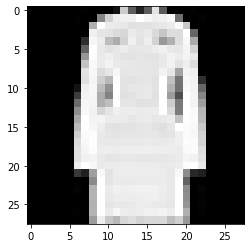

In [ ]:
num= 500
plt.imshow(x_train[num],cmap='gray')
print(y_train[num],label_dict.get(y_train[num]))

In [ ]:
# Normalization of images

x_train = x_train/255

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# one hot encoding of our y_train

y_train_ohe = tf.keras.utils.to_categorical(y_train)


In [ ]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model= tf.keras.models.Sequential()
#  first layer of model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# second layer of model (Dense)
model.add(tf.keras.layers.Dense(512, activation='relu',))
# third and final layer (Dense)
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [ ]:
# loss (coss entropy)
# 1 Binary 
# 2. Categorical  - labels are in numerical format & one hot encoding format too
# 3. Sparse categorical - labels can be in string format

In [ ]:
model_history = model.fit(x_train, y_train_ohe, validation_split=0.1, epochs=10,)

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2698 - acc: 0.9061 - val_loss: 0.3310 - val_acc: 0.8790
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2672 - acc: 0.9057 - val_loss: 0.3233 - val_acc: 0.8828
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2640 - acc: 0.9073 - val_loss: 0.3196 - val_acc: 0.8850
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2617 - acc: 0.9079 - val_loss: 0.3348 - val_acc: 0.8782
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2584 - acc: 0.9091 - val_loss: 0.3273 - val_acc: 0.8825
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2554 - acc: 0.9106 - val_loss: 0.3157 - val_acc: 0.8878
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2520 - acc: 0.9118 - val_loss: 0.3226 - val_acc: 0.8852
Epoch 8/10
1688/1688 [==============================] - 6s 4ms

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

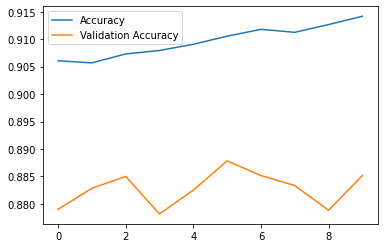

In [ ]:
plt.plot(model_history.history.get('acc'),label='Accuracy')
plt.plot(model_history.history.get('val_acc'),label='Validation Accuracy')
plt.legend()
plt.show()

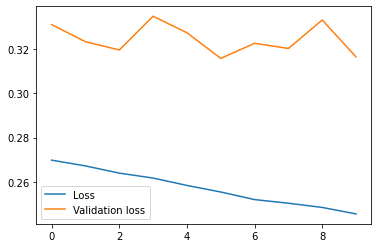

In [ ]:
plt.plot(model_history.history.get('loss'),label='Loss')
plt.plot(model_history.history.get('val_loss'),label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# 100 calls - 1 is converted
# model says - 100 calls not converted
# Accuracy - 99% (not converted)
# call was converted 0/1 (0%)

# call converted - 0/1
# call not converted - 99/99

# Confusion matrix - study source - https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
x_test = x_test/255

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_non_ohe = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred_non_ohe,target_names=list(label_dict.values())))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.88      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.79      0.79      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.74      0.87      0.80      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.81      0.57      0.67      1000
     Sneaker       0.92      0.95      0.94      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
confusion_matrix(y_test, y_pred_non_ohe)

array([[882,   1,  16,  31,   8,   2,  50,   0,  10,   0],
       [  3, 968,   0,  22,   4,   0,   2,   0,   1,   0],
       [ 22,   1, 791,  15, 134,   0,  36,   0,   1,   0],
       [ 26,   9,  14, 890,  40,   0,  15,   0,   6,   0],
       [  0,   1,  77,  23, 874,   0,  22,   0,   3,   0],
       [  0,   0,   0,   1,   0, 955,   0,  30,   2,  12],
       [167,   1, 105,  32, 115,   0, 566,   0,  14,   0],
       [  0,   0,   0,   0,   0,  25,   0, 952,   0,  23],
       [  6,   0,   5,   6,   6,   2,   5,   6, 964,   0],
       [  0,   0,   0,   0,   0,   7,   1,  43,   0, 949]])

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred_non_ohe),columns=list(label_dict.values()),index=[i + '_Actual' for i in list(label_dict.values())])

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top_Actual,882,1,16,31,8,2,50,0,10,0
Trouser_Actual,3,968,0,22,4,0,2,0,1,0
Pullover_Actual,22,1,791,15,134,0,36,0,1,0
Dress_Actual,26,9,14,890,40,0,15,0,6,0
Coat_Actual,0,1,77,23,874,0,22,0,3,0
Sandal_Actual,0,0,0,1,0,955,0,30,2,12
Shirt_Actual,167,1,105,32,115,0,566,0,14,0
Sneaker_Actual,0,0,0,0,0,25,0,952,0,23
Bag_Actual,6,0,5,6,6,2,5,6,964,0
Ankle boot_Actual,0,0,0,0,0,7,1,43,0,949


In [ ]:
#or - colums show the actual values where, index shows the predicted

pd.DataFrame(confusion_matrix(y_test, y_pred_non_ohe).T,columns=list(label_dict.values()),index=list(label_dict.values())) 

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,882,3,22,26,0,0,167,0,6,0
Trouser,1,968,1,9,1,0,1,0,0,0
Pullover,16,0,791,14,77,0,105,0,5,0
Dress,31,22,15,890,23,1,32,0,6,0
Coat,8,4,134,40,874,0,115,0,6,0
Sandal,2,0,0,0,0,955,0,25,2,7
Shirt,50,2,36,15,22,0,566,0,5,1
Sneaker,0,0,0,0,0,30,0,952,6,43
Bag,10,1,1,6,3,2,14,0,964,0
Ankle boot,0,0,0,0,0,12,0,23,0,949


In [ ]:
np.where((y_test==6)&(y_pred_non_ohe==8))[0]

array([1642, 2367, 2732, 2910, 3663, 4505, 5065, 5123, 5510, 6596, 8211,
       8567, 9183, 9227])

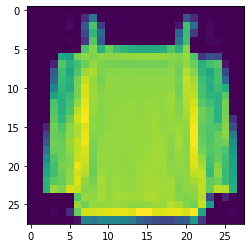

In [ ]:
plt.imshow(x_test[2910])